# City and Distrcits

### 1.  Loading Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### 2. Reading the Dataset <a id='2'></a>

- DC_Dist:             District 	A two character field that names the District boundary. 	                        Text
- DC_Key:              DC Number 	The unique identifier of the crime that consists of Year + District + Unique ID. 	Text
- Dispatch_Date_Time:  Dispatch Date/Time 	The date and time that the officer was dispatched to the scene. 	        Date/Time
- Hour:          	   The generalized hour of the dispatched time. 	                                                Date/Time
- Location_Block: 	   Location Block 	The location of crime generalized by street block. 	                            Text
- Sector:    	       PSA 	A single character field that names the Police Service Area boundary. 	                    Text
- Text_General_Code:   General Crime Category 	The generalized text for the crime code. 	                            Text
- UCR_General: 	       UCR Code 	The rounded crime code, i.e. 614 to 600.


In [8]:
path = '/home/eduardo/Desktop/Proyecto/Philadelphia/'
file = 'crime_philadelphia_20062019.csv'

data = pd.read_csv(path+file,index_col='dispatch_date',parse_dates=True, usecols=['dispatch_date','dispatch_time','dc_dist','psa','location_block','ucr_general','text_general_code','point_x','point_y'])
data.head()

,dispatch_time,dc_dist,psa,location_block,ucr_general,text_general_code,point_x,point_y
dispatch_date,,,,,,,,
2015-12-17,07:26:00,1,1,1800 BLOCK S CHADWICK ST,1400.0,Vandalism/Criminal Mischief,-75.173172,39.928303
2015-12-17,11:04:00,1,1,1500 BLOCK MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172603,39.925975
2015-12-18,22:55:00,1,1,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.175081,39.922675
2015-12-19,00:54:00,1,1,2200 BLOCK S 17TH ST,1400.0,Vandalism/Criminal Mischief,-75.174745,39.923722
2015-12-20,01:07:00,1,1,S 16TH ST / MC KEAN ST,1400.0,Vandalism/Criminal Mischief,-75.172683,39.926027


In [9]:
data.isnull().sum()

dispatch_time            0
dc_dist                  0
psa                      0
location_block           0
ucr_general           1685
text_general_code     1685
point_x              20242
point_y              20242
dtype: int64

### 3. City and Districts Dataset <a id='3'></a>

In [10]:
# List of Philadelphia Distrcists
districts = data['dc_dist'].unique().tolist()

In [11]:
# Creating new DF
df = pd.DataFrame()

In [12]:
# City Column
df['city'] = data.groupby(pd.Grouper(freq="M"))['dc_dist'].count()

In [13]:
# District Columns
for dist in districts:
    dis_str = str(dist)
    df['dist_'+ dis_str] = data[data['dc_dist'] == dist].groupby(pd.Grouper(freq="M"))['dc_dist'].count()

In [14]:
# Remove the last month
df = df.iloc[:(len(df)-1)]

In [15]:
df.isnull().sum()

city         0
dist_1       0
dist_2       0
dist_18      0
dist_77      0
dist_3       0
dist_5       0
dist_6       0
dist_14      0
dist_17      0
dist_7       0
dist_8       0
dist_9       0
dist_16      0
dist_15      0
dist_22      0
dist_24      0
dist_12      0
dist_19      0
dist_35      0
dist_25      0
dist_26      0
dist_39      0
dist_4      34
dist_23     74
dist_92    120
dtype: int64

In [16]:
# Removing some columns with na values
cols_to_drop = ['dist_4','dist_23','dist_92']
df.drop(columns=cols_to_drop,inplace=True)

In [17]:
df.head()

,city,dist_1,dist_2,dist_18,dist_77,dist_3,dist_5,dist_6,dist_14,dist_17,dist_7,dist_8,dist_9,dist_16,dist_15,dist_22,dist_24,dist_12,dist_19,dist_35,dist_25,dist_26,dist_39
dispatch_date,,,,,,,,,,,,,,,,,,,,,,,
2006-01-31,19359,512,794,898,62,468,290,899,1134,642,362,681,638,568,1410,804,1341,1126,1066,1188,1532,701,910
2006-02-28,15894,385,712,676,52,444,283,723,830,572,325,654,518,440,1205,649,1027,863,894,1003,1352,572,662
2006-03-31,18627,561,817,771,61,533,257,777,1008,664,335,623,683,607,1368,741,1306,1076,954,1111,1678,659,792
2006-04-30,18940,466,922,843,49,565,282,759,1025,766,389,598,657,594,1367,767,1325,1126,941,1126,1578,776,721
2006-05-31,20041,458,1029,918,62,509,259,867,1100,778,428,664,747,648,1391,837,1259,1164,1038,1242,1642,796,833


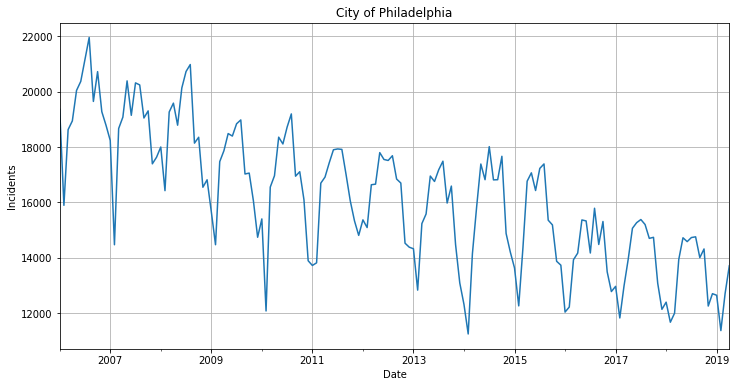

In [18]:
ax = df['city'].plot(figsize=(12,6),grid=True)
ax.set(xlabel='Date',ylabel='Incidents',title='City of Philadelphia');

In [20]:
df.to_csv('../data/CSV/city_districts.csv')